In [18]:
###--------------------------------------------LOAD LIBRARIES
import scanpy as sc
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
import scipy.stats as stats

In [19]:
###--------------------------------------------LOAD DATA

#--Load tangram deconvoluted data and combine IF and nonIF data
adata = sc.read("../LIBD_LR/grantpm/DLPFC_Visium_LIBD/processed-data/MGP_analysis/nonIF_c2l_anndata_combined.h5ad")
adata.obs['key'] = adata.obs.index+'_'+adata.obs['sample_id'].astype(str)
adata.obs['bayesSpace_harmony_16'] = adata.obs['bayesSpace_harmony_16'].astype('category')

In [20]:
top = pd.read_csv('processed_data/psychiatric_gene_clusters.csv' , sep = ',', index_col = 0)
for n in range(0,100):
        sc.tl.score_genes(adata, list(adata.var[adata.var['gene_name'].isin(list(top.index))].index), ctrl_size = len(list(top.index)))
        df = pd.DataFrame(adata.obs['score'])
        if (n == 0):
            all_scores = df
        else: 
            all_scores = pd.concat([all_scores, df], axis = 1)
        adata.obs['score'] = all_scores.mean(axis = 1)
        temp = adata.obs[['bayesSpace_harmony_9', 'bayesSpace_harmony_16', 'score']]
        

/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an in

In [44]:
temp.to_csv('processed_data/04-psychiatric_specificity/04c_psychiatric_spatial_domain_analysis/spatial_domain_09_enrichment.csv')

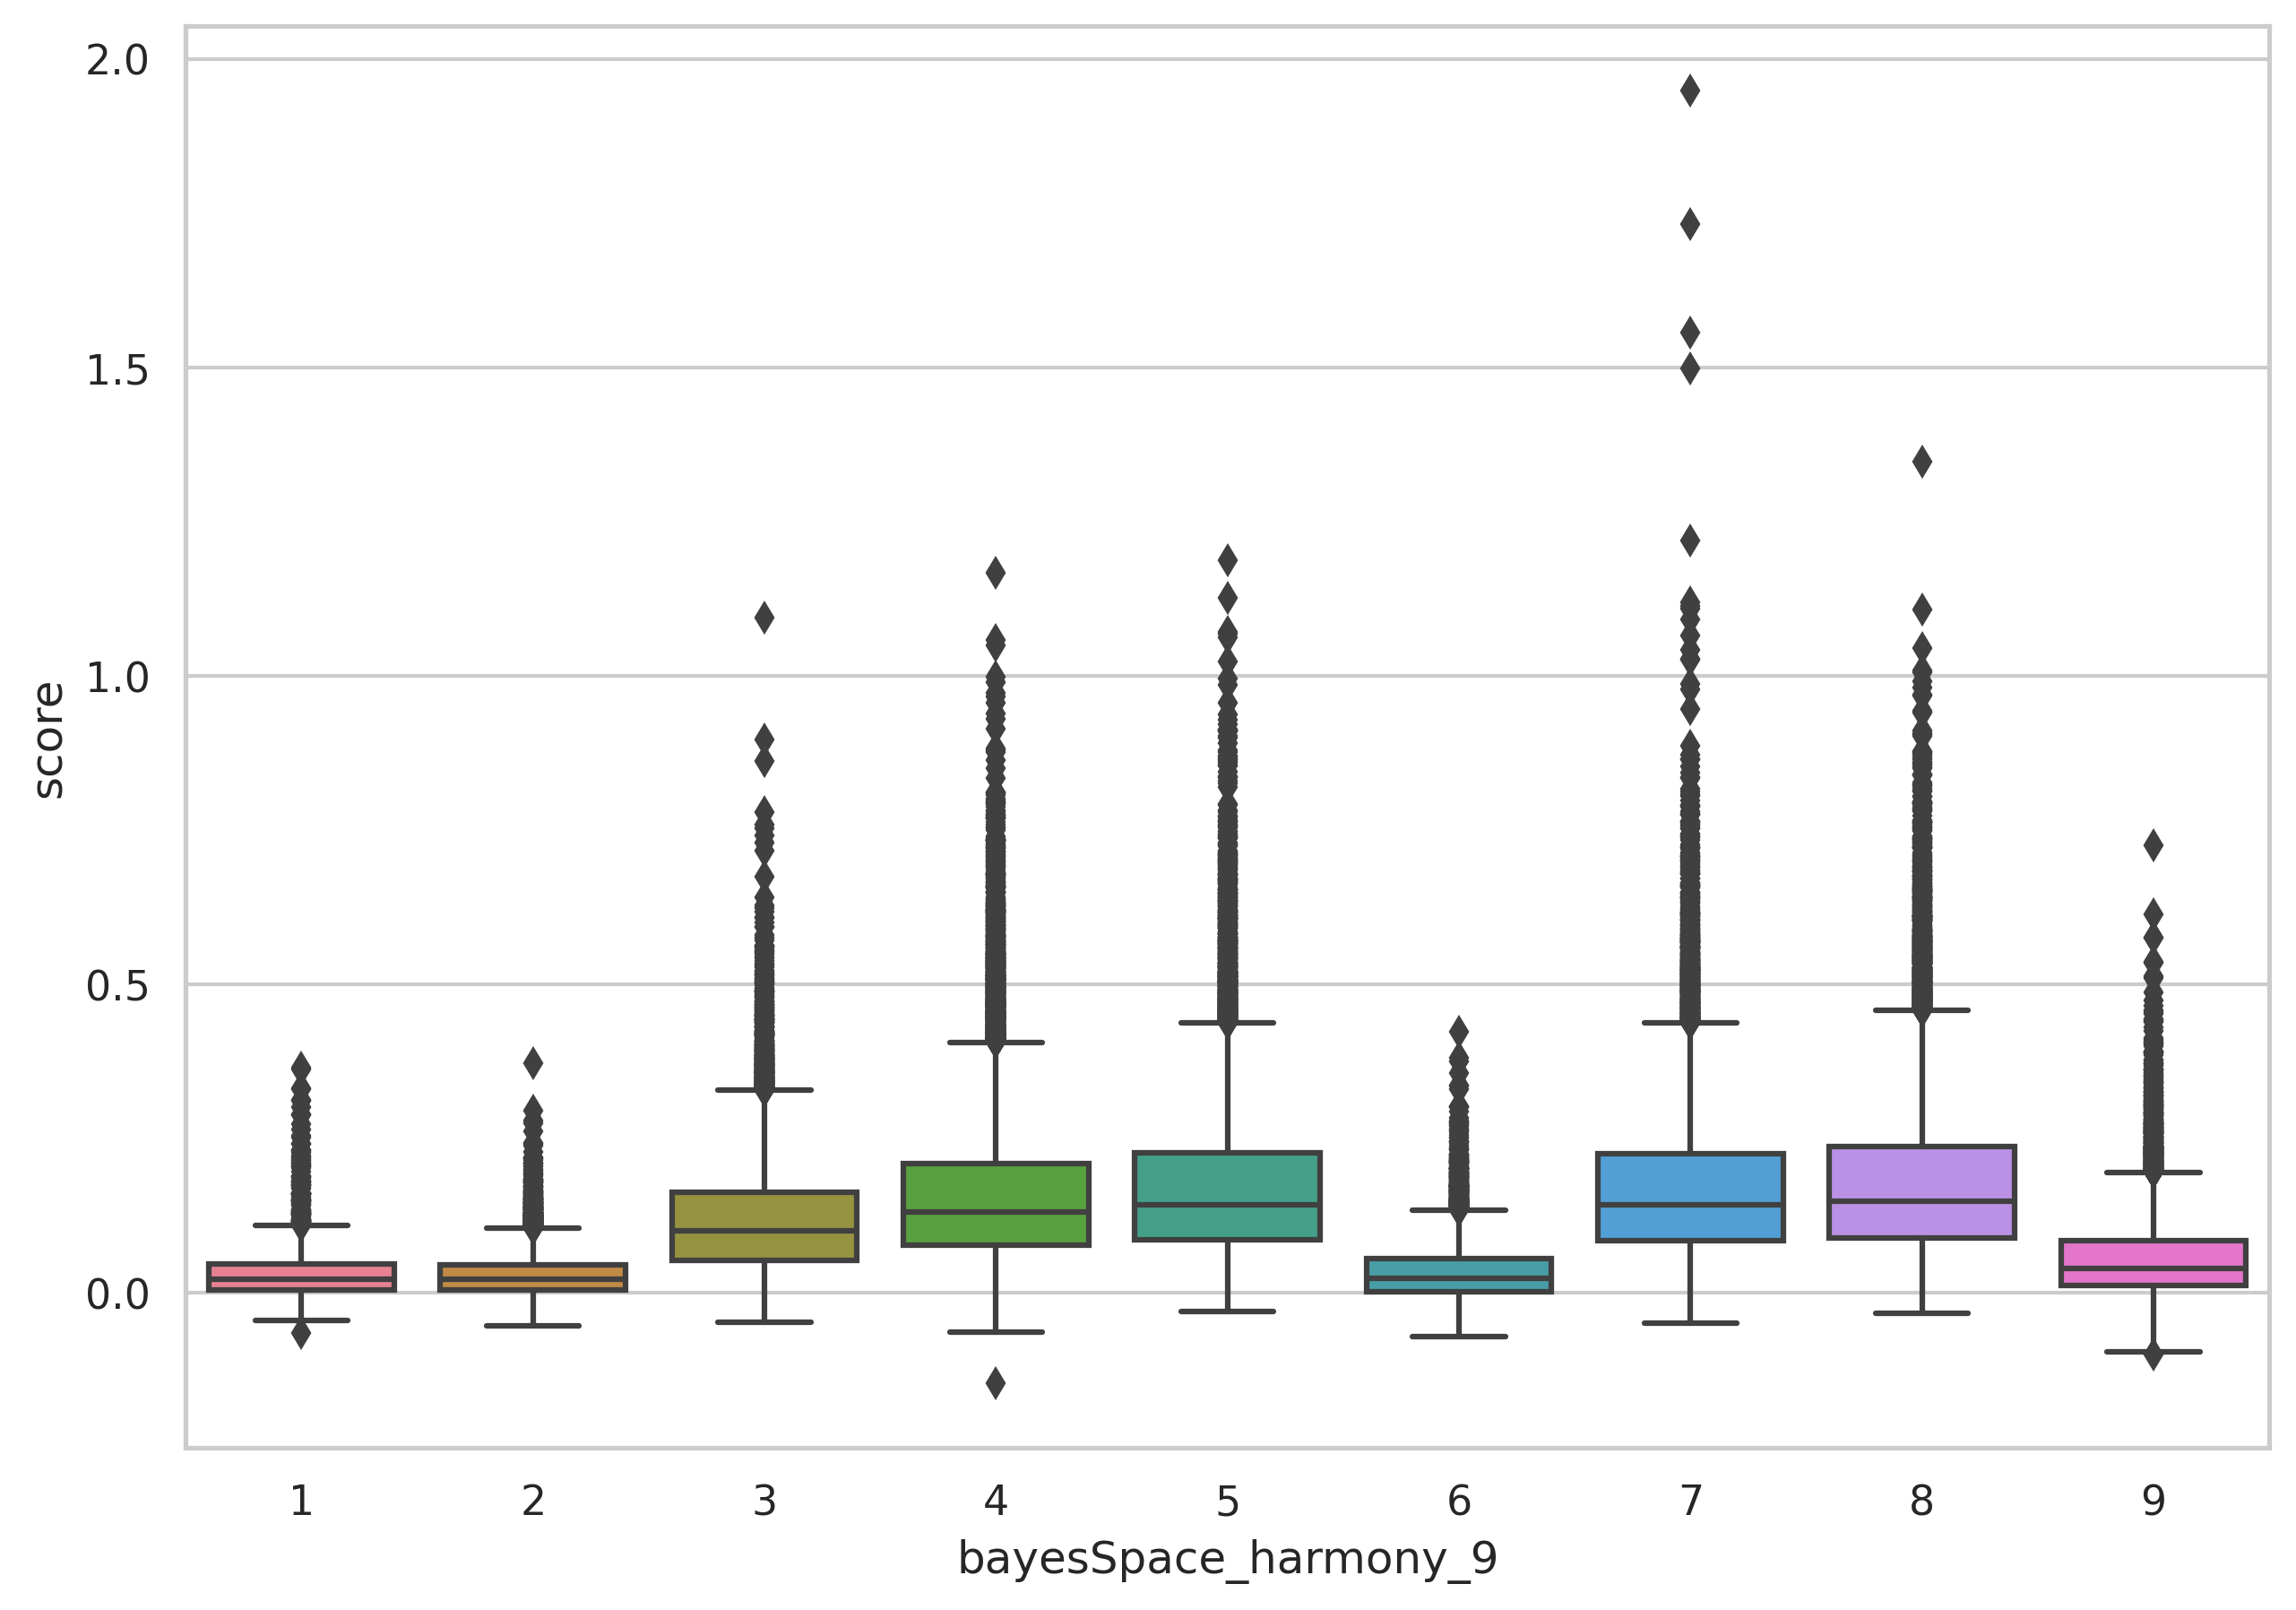

In [37]:
sns.set_theme(style="whitegrid", palette= sns.color_palette("husl", 9))
plt.figure(figsize=(10,7), dpi = 300)
sns.boxplot(data=temp, x="bayesSpace_harmony_9", y="score")
plt.savefig('plots/04-psychiatric_specificity/04c_psychiatric_spatial_domain_analysis/gene_list_score_spatialdomain_09.pdf', bbox_inches = 'tight')
plt.show()

In [49]:
pd.DataFrame(stats.f_oneway(temp[temp['bayesSpace_harmony_9']==1]['score'], temp[temp['bayesSpace_harmony_9']==2]['score'], temp[temp['bayesSpace_harmony_9']==3]['score'], 
               temp[temp['bayesSpace_harmony_9']==4]['score'], temp[temp['bayesSpace_harmony_9']==5]['score'], temp[temp['bayesSpace_harmony_9']==6]['score'], 
               temp[temp['bayesSpace_harmony_9']==7]['score'], temp[temp['bayesSpace_harmony_9']==8]['score'], temp[temp['bayesSpace_harmony_9']==9]['score'])).to_csv('processed_data/04-psychiatric_specificity/04c_psychiatric_spatial_domain_analysis/Foneway_spatial_domain_09_enrichment.csv')

pd.DataFrame(stats.ranksums(temp[temp['bayesSpace_harmony_9']==8]['score'], temp[temp['bayesSpace_harmony_9']!=8]['score'])).to_csv('processed_data/04-psychiatric_specificity/04c_psychiatric_spatial_domain_analysis/Wilcoxon_ranksums_spatial_domain_09_enrichment_C8vAll.csv')